# 6/5/20 MolSSI Workshop
## Tabular data
Processing tabular data using numpy

### reading in tabular data

In [7]:
import numpy #numpy function only works in tabular = same number of columns 
import os

In [8]:
help(numpy.genfromtxt) #python function that loads data from the text file

# arguments maybe useful for HW 2
    #delimiter - this is where we want to split
    #skip_header

Help on function genfromtxt in module numpy:

genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=" !#$%&'()*+,-./:;<=>?@[\\]^{|}~", replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes')
    Load data from a text file, with missing values handled as specified.
    
    Each line past the first `skip_header` lines is split at the `delimiter`
    character, and characters following the `comments` character are discarded.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is `.gz` or `.bz2`, the file is first decompressed. Note
        that generators must return byte strings. The string

In [9]:
distance_file = os.path.join('data', 'distance_data_headers.csv')
distances = numpy.genfromtxt(fname = distance_file, delimiter = ',', dtype = 'unicode') 
    #delimiter = ',' -- this is where we want to split
    #dtype = unicode -- means we read everything as string (instead of numbers)
        #because we want to read the headers
print(distances)

[['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']
 ['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


### manipulating tabular data

In [10]:
headers = distances[0]
print(headers)

['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']


In [11]:
# exercise: slice distances to get the numerical values (everything but the header)

data = distances[1:]
print(data)

[['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ['3' '9.0066' '6.0637' '13.0924' '11.3043']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [12]:
#cast to number from string
data = data.astype(numpy.float) #want the type to be float
print(data) #same numbers but expressed in scientific notation

[[1.00000e+00 8.95420e+00 5.80240e+00 1.15478e+01 9.95570e+00]
 [2.00000e+00 8.61810e+00 6.09420e+00 1.39594e+01 1.16945e+01]
 [3.00000e+00 9.00660e+00 6.06370e+00 1.30924e+01 1.13043e+01]
 ...
 [9.99800e+03 8.66250e+00 7.73060e+00 9.54690e+00 1.03063e+01]
 [9.99900e+03 9.24560e+00 7.88860e+00 9.81510e+00 1.07564e+01]
 [1.00000e+04 8.81350e+00 7.91700e+00 9.95170e+00 1.07848e+01]]


In [13]:
# to slice a 2D array
    # array_name[row_index, column_index]
    # *row is horizontal, column is vertical*
print(data[0,1])
print(data[1,0])

8.9542
2.0


In [14]:
small_data = data[0:10, 0:3] # ex) start at index 0 and up to but not including 10
    #first 10 rows, first 3 columns
print(small_data)

[[ 1.      8.9542  5.8024]
 [ 2.      8.6181  6.0942]
 [ 3.      9.0066  6.0637]
 [ 4.      9.2002  6.0227]
 [ 5.      9.1294  5.9365]
 [ 6.      9.0462  6.2553]
 [ 7.      8.8657  5.9186]
 [ 8.      9.3256  6.2351]
 [ 9.      9.4184  6.1993]
 [10.      9.06    6.0478]]


In [15]:
print(small_data[:, 1:]) # (:) means all rows

[[8.9542 5.8024]
 [8.6181 6.0942]
 [9.0066 6.0637]
 [9.2002 6.0227]
 [9.1294 5.9365]
 [9.0462 6.2553]
 [8.8657 5.9186]
 [9.3256 6.2351]
 [9.4184 6.1993]
 [9.06   6.0478]]


In [16]:
# data_average = numpy.mean(data_set)

In [17]:
print(headers)

['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']


### analyzing tabular data

In [18]:
thr4_atp = data[:, 1]
avg_thr4_atp = numpy.mean(thr4_atp)
print(avg_thr4_atp)

10.876950930000001


In [19]:
# create a variable called num_columns which is the number of columns in our data
num_columns = len(headers)
print(num_columns)

5


In [20]:
for i in range(1, num_columns): 
    # print(i)
    column = data[:, i]
    avg_col = numpy.mean(column)
    data_label = headers[i]
    print(F'{data_label} : {avg_col:.3f}')

THR4_ATP : 10.877
THR4_ASP : 7.342
TYR6_ATP : 11.210
TYR6_ASP : 10.993


## Plotting and data visualization
plotting data using matplotlib

### plotting data

In [21]:
import matplotlib.pyplot as plt #import name of the library and name shortcut 
    # plt = shortcut of the library name 

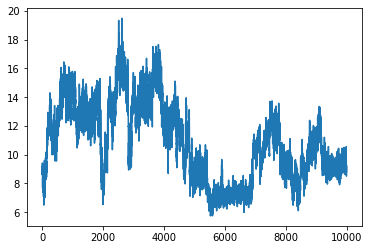

In [22]:
plt.figure() #make a new plot
plt.plot(data[:,1]) #plot 

### labeling plots and saving figures

#### increasing image resolution

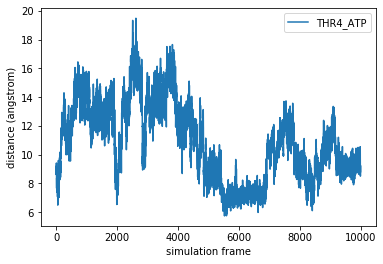

In [23]:
plt.figure()

sample_name = headers[1]

plt.xlabel('simulation frame')
plt.ylabel('distance (angstrom)')
plt.plot(data[:, 1], label = sample_name)
plt.legend() # in order for sample_name to show up
# plt.title('title') 

# to save a figure
plt.savefig(F'{sample_name}.png', dpi=300) #dpi = resolution

#### plotting more than one set of data

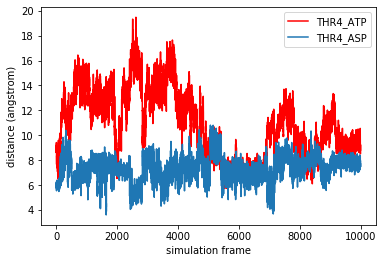

In [24]:
# plot two sets of data
plt.figure()

sample_name = headers[1]

plt.xlabel('simulation frame')
plt.ylabel('distance (angstrom)')
plt.plot(data[:, 1], label = sample_name, color = 'red')
plt.plot(data[:, 2], label = headers[2]) # the numbers 2 matches!
plt.legend() # in order for sample_name to show up
# plt.title('title') 

# to save a figure
plt.savefig('two_samples.png', dpi=300) #dpi = resolution

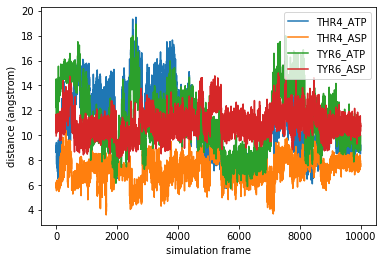

In [25]:
# plot every column 
plt.figure()

for col in range(1, num_columns): #indentation is important in python
    plt.plot(data[:, col], label = headers[col])

plt.xlabel('simulation frame')
plt.ylabel('distance (angstrom)')
plt.legend()

plt.savefig('all_samples.png')

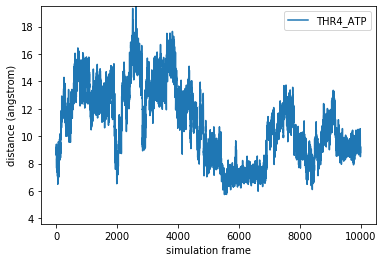

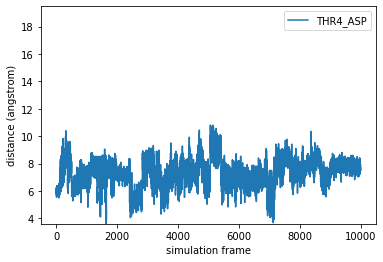

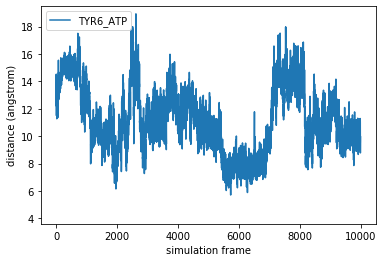

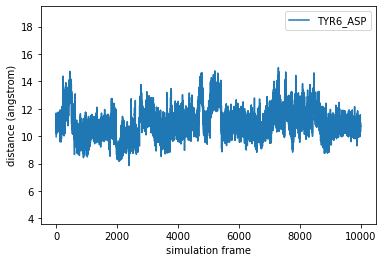

In [26]:
# make a plot for each sample
# try adding savefig with file name = sample name.

# figure out min and max of the y (distance data)
data_min = numpy.min(data[:, 1:])
data_max = numpy.max(data[:, 1:])

for col in range(1, num_columns): #indentation is important in python
    sample_name = headers[col]
    plt.figure()
    plt.plot(data[:, col], label = sample_name)
    plt.ylim(data_min, data_max) #normalizing your axes across plots
    # plt.ylim(4,20)
    
    plt.xlabel('simulation frame')
    plt.ylabel('distance (angstrom)')
    plt.legend()
    
    plt.savefig(F'{sample_name}.png')

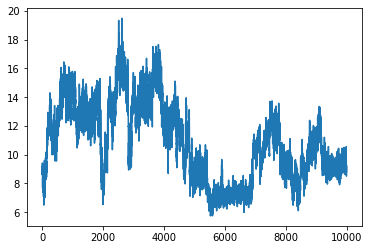

In [27]:
plt.figure()
plt.plot(data[:,0], data[:,1])

In [28]:
data[:10:2, :] # :2 giving increment (1, 3, 5...)

array([[ 1.    ,  8.9542,  5.8024, 11.5478,  9.9557],
       [ 3.    ,  9.0066,  6.0637, 13.0924, 11.3043],
       [ 5.    ,  9.1294,  5.9365, 13.5321, 10.6279],
       [ 7.    ,  8.8657,  5.9186, 12.9312, 10.2176],
       [ 9.    ,  9.4184,  6.1993, 13.2614, 10.366 ]])

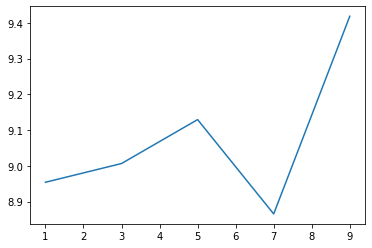

In [29]:
plt.figure()
plt.plot(data[:10:2, 0], data[:10:2, 1])

Text(0, 0.5, 'distance (angstrom)')

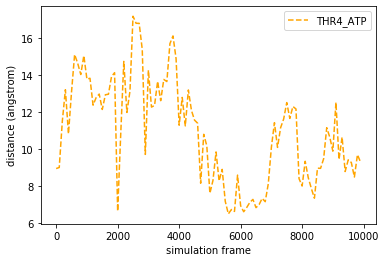

In [30]:
# when x is not specified 
    #plt.figure()
    #plt.plot(data[::100,1])
    
plt.figure()
plt.plot(data[::100,0], data[::100,1], '--', label = headers[1], color = 'orange') #color customization
    # '--' has to come before label - dash line! 
    # '-o'= dot plot
    # check out documentation online for further customization
plt.legend()
plt.xlabel('simulation frame')
plt.ylabel('distance (angstrom)')

### multiple plots with subplot

(4,)

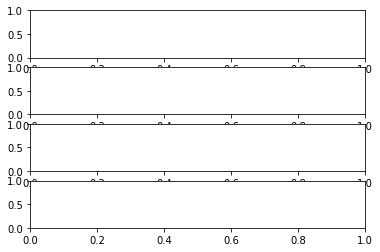

In [31]:
#syntax
#fig, ax = plt.subplots(nrows, ncolumns)

fig, ax = plt.subplots(len(headers)-1, 1)
ax.shape

(2, 2)

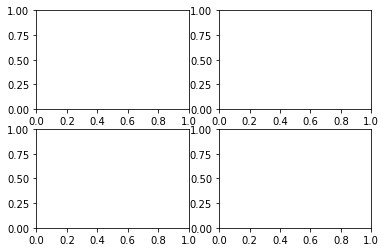

In [32]:
fig2, ax2 = plt.subplots(2,2)
ax2.shape

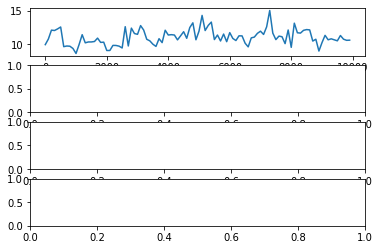

In [33]:
# to add data to plots, use the same slicing syntax as numpy arrays
ax[0].plot(data[0::100,0], data[0::100,col])
fig

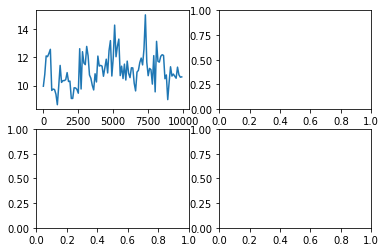

In [35]:
# fig2
ax2[0,0].plot(data[0::100,0], data[0::100,col])
fig2

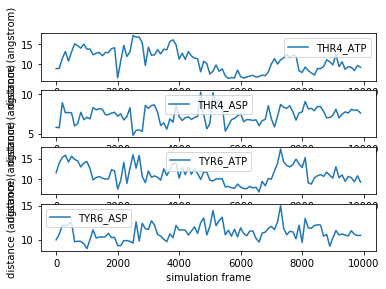

In [36]:
# use a for loop to add all of data to fig
fig, ax = plt.subplots(len(headers)-1, 1)

for col in range(1, len(headers)):
    sample = headers[col]
    
    ax[col-1].plot(data[0::100,0], data[0::100,col], label=sample)
    ax[col-1].set_xlabel('simulation frame')
    ax[col-1].set_ylabel('distance (angstrom)')
    ax[col-1].legend()

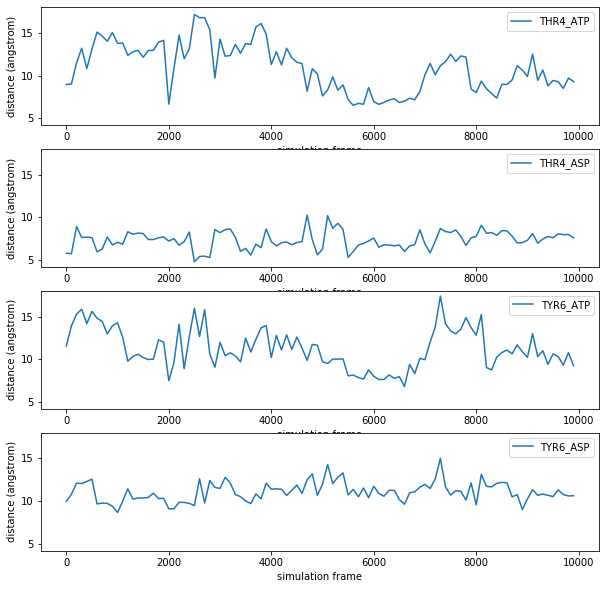

In [39]:
# improving the figure

# figsize = specify the desired figure width and height in inches -- not appear this size on the screen but is the size when it's saved.
# sharey = true -- make all the y axes the same 

fig, ax = plt.subplots(len(headers)-1, 1, figsize=(10,10), sharey = True)

for col in range(1, len(headers)):
    sample = headers[col]
    
    ax[col-1].plot(data[0::100,0], data[0::100,col], label=sample)
    ax[col-1].set_xlabel('simulation frame')
    ax[col-1].set_ylabel('distance (angstrom)')
    ax[col-1].legend()

## Homework 2
- data folder - water.xyz
- first line = number of atoms (3)
- second line = comment (can be anything) 
- all the rest line: x, y, z coordinates for the atoms
 
- read this file into a script and analyze all of the distances of those atoms 
- challenge: remove duplication 
- online resource: 4. working with tabular data
- use distance formula! 

1. read in xyz file
2. separation of atom symbols (string) and coordinates (float) - slicing and casting
3. measure distance (always between two atoms) - every atom being atom1 and the atom2 
    - for loop inside of the for loop